
# Notebook 00: Environment Setup & Basic Spatial Operations Demo

This notebook is designed to:
1.  Verify that the core Python libraries for spatial analysis are correctly installed and importable within the Conda environment (`spatial-ml-env`).
2.  Demonstrate the creation of basic vector geometries using `shapely`.
3.  Show how to create and manipulate `GeoDataFrame` objects using `geopandas`.
4.  Illustrate simple spatial operations (e.g., buffering, reprojection).
5.  Confirm basic plotting capabilities, including the use of `contextily` for basemaps.

This serves as a "smoke test" to ensure your environment is ready for the more advanced spatial ML notebooks.


In [10]:
import sys
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
import fiona # Though often a backend, explicit import can be useful for version check

# Configure plotting style
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (8, 8) # Default figure size for this notebook

print("Libraries imported successfully.")

Libraries imported successfully.


In [11]:
print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"GeoPandas version: {gpd.__version__}")
print(f"Shapely version: {shapely.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Contextily version: {ctx.__version__}")
print(f"Fiona version: {fiona.__version__}")

Python version: 3.10.17 | packaged by conda-forge | (main, Apr 10 2025, 22:15:49) [Clang 18.1.8 ]
Pandas version: 2.2.3
NumPy version: 2.2.6
GeoPandas version: 1.0.1
Shapely version: 2.1.1
Matplotlib version: 3.10.3
Seaborn version: 0.13.2
Contextily version: 1.6.2
Fiona version: 1.10.1


In [12]:
# Create a Point (longitude, latitude)
# Example: Exeter Cathedral
point_exeter = Point(-3.5303, 50.7220)
print(f"Shapely Point: {point_exeter.wkt}")

# Create a LineString
# Example: A simple path
line_path = LineString([(-3.53, 50.72), (-3.525, 50.725), (-3.52, 50.722)])
print(f"Shapely LineString: {line_path.wkt}")

# Create a Polygon
# Example: A small area
polygon_area = Polygon([(-3.53, 50.72), (-3.52, 50.72), (-3.525, 50.725)])
print(f"Shapely Polygon: {polygon_area.wkt}")

# Accessing properties
print(f"\nPoint X coordinate: {point_exeter.x}")
print(f"LineString length (in decimal degrees, approx): {line_path.length:.4f}") # Note: length on geographic CRS is tricky
print(f"Polygon area (in decimal degrees squared, approx): {polygon_area.area:.6f}") # Same for area

Shapely Point: POINT (-3.5303 50.722)
Shapely LineString: LINESTRING (-3.53 50.72, -3.525 50.725, -3.52 50.722)
Shapely Polygon: POLYGON ((-3.53 50.72, -3.52 50.72, -3.525 50.725, -3.53 50.72))

Point X coordinate: -3.5303
LineString length (in decimal degrees, approx): 0.0129
Polygon area (in decimal degrees squared, approx): 0.000025


In [13]:
# Create a GeoDataFrame
data = {
    'id': [1, 2, 3],
    'name': ['Exeter Cathedral', 'Simple Path', 'Small Area'],
    'geometry': [point_exeter, line_path, polygon_area]
}
# Specify the CRS when creating the GeoDataFrame
# EPSG:4326 is WGS84 (latitude/longitude)
gdf = gpd.GeoDataFrame(data, crs="EPSG:4326")

print("GeoDataFrame created:")
display(gdf)
print(f"\nCRS of the GeoDataFrame: {gdf.crs}")
print(f"\nGeometry types in GeoDataFrame:\n{gdf.geom_type}")

GeoDataFrame created:


,id,name,geometry
0,1,Exeter Cathedral,POINT (-3.5303 50.722)
1,2,Simple Path,"LINESTRING (-3.53 50.72, -3.525 50.725, -3.52 ..."
2,3,Small Area,"POLYGON ((-3.53 50.72, -3.52 50.72, -3.525 50...."



CRS of the GeoDataFrame: EPSG:4326

Geometry types in GeoDataFrame:
0         Point
1    LineString
2       Polygon
dtype: object


In [14]:
# Buffering the point (Exeter Cathedral)
# A buffer of 0.001 decimal degrees is arbitrary here.
point_buffer_geo = gdf.loc[gdf['name'] == 'Exeter Cathedral', 'geometry'].buffer(0.001)
print(f"Buffer around Exeter Cathedral (geographic CRS):\n{point_buffer_geo.iloc[0].wkt[:100]}...") # Print first 100 chars




# To create a buffer in meters, we first reproject to a projected CRS.
# For the UK, EPSG:27700 (British National Grid) is suitable.
gdf_bng = gdf.to_crs("EPSG:27700")
print(f"\nGeoDataFrame reprojected to British National Grid (EPSG:27700):\nCRS: {gdf_bng.crs}")
display(gdf_bng.head())

# Now create a 100-meter buffer around Exeter Cathedral in BNG
point_buffer_bng_geom = gdf_bng.loc[gdf_bng['name'] == 'Exeter Cathedral', 'geometry'].buffer(100)
point_buffer_bng_gdf = gpd.GeoDataFrame(geometry=point_buffer_bng_geom, crs="EPSG:27700")
print(f"\n100m Buffer around Exeter Cathedral (Projected CRS - BNG):\n{point_buffer_bng_gdf.geometry.iloc[0].wkt[:100]}...")
print(f"Area of 100m buffer: {point_buffer_bng_gdf.area.iloc[0]:.2f} sq meters")

Buffer around Exeter Cathedral (geographic CRS):
POLYGON ((-3.5293 50.722, -3.5293048152733277 50.72190198285967, -3.529319214719597 50.7218049096779...

GeoDataFrame reprojected to British National Grid (EPSG:27700):
CRS: EPSG:27700


/var/folders/sy/gz5gl6d91cbfwd2z85r62rbc0000gn/T/ipykernel_22824/404047423.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point_buffer_geo = gdf.loc[gdf['name'] == 'Exeter Cathedral', 'geometry'].buffer(0.001)


,id,name,geometry
0,1,Exeter Cathedral,POINT (292075.826 92493.414)
1,2,Simple Path,"LINESTRING (292092.403 92270.594, 292456.799 9..."
2,3,Small Area,"POLYGON ((292092.403 92270.594, 292798.275 922..."



100m Buffer around Exeter Cathedral (Projected CRS - BNG):
POLYGON ((292175.8263440304 92493.41444649539, 292175.3448166976 92483.61273246242, 292173.904872070...
Area of 100m buffer: 31365.48 sq meters


In [15]:
# Create another polygon that might overlap
overlapping_poly_bng = Polygon([(gdf_bng.total_bounds[0]+100, gdf_bng.total_bounds[1]+100), 
                                (gdf_bng.total_bounds[2]-100, gdf_bng.total_bounds[1]+100), 
                                (gdf_bng.total_bounds[2]-100, gdf_bng.total_bounds[3]-100)])
overlapping_gdf_bng = gpd.GeoDataFrame([{'id': 4, 'name': 'Overlapping Poly', 'geometry': overlapping_poly_bng}], crs="EPSG:27700")

small_area_bng_geom = gdf_bng[gdf_bng['name'] == 'Small Area'].geometry.iloc[0]
intersection_geom = small_area_bng_geom.intersection(overlapping_poly_bng)

if not intersection_geom.is_empty:
    intersection_gdf = gpd.GeoDataFrame([{'id':5, 'name': 'Intersection', 'geometry': intersection_geom}], crs="EPSG:27700")
    print("\nIntersection found:")
    display(intersection_gdf)
    print(f"Intersection geometry type: {intersection_gdf.geom_type.iloc[0]}")
else:
    print("\nNo intersection found between 'Small Area' and the new 'Overlapping Poly'.")


Intersection found:


,id,name,geometry
0,5,Intersection,"POLYGON ((292702.844 92413.448, 292702.844 923..."


Intersection geometry type: Polygon


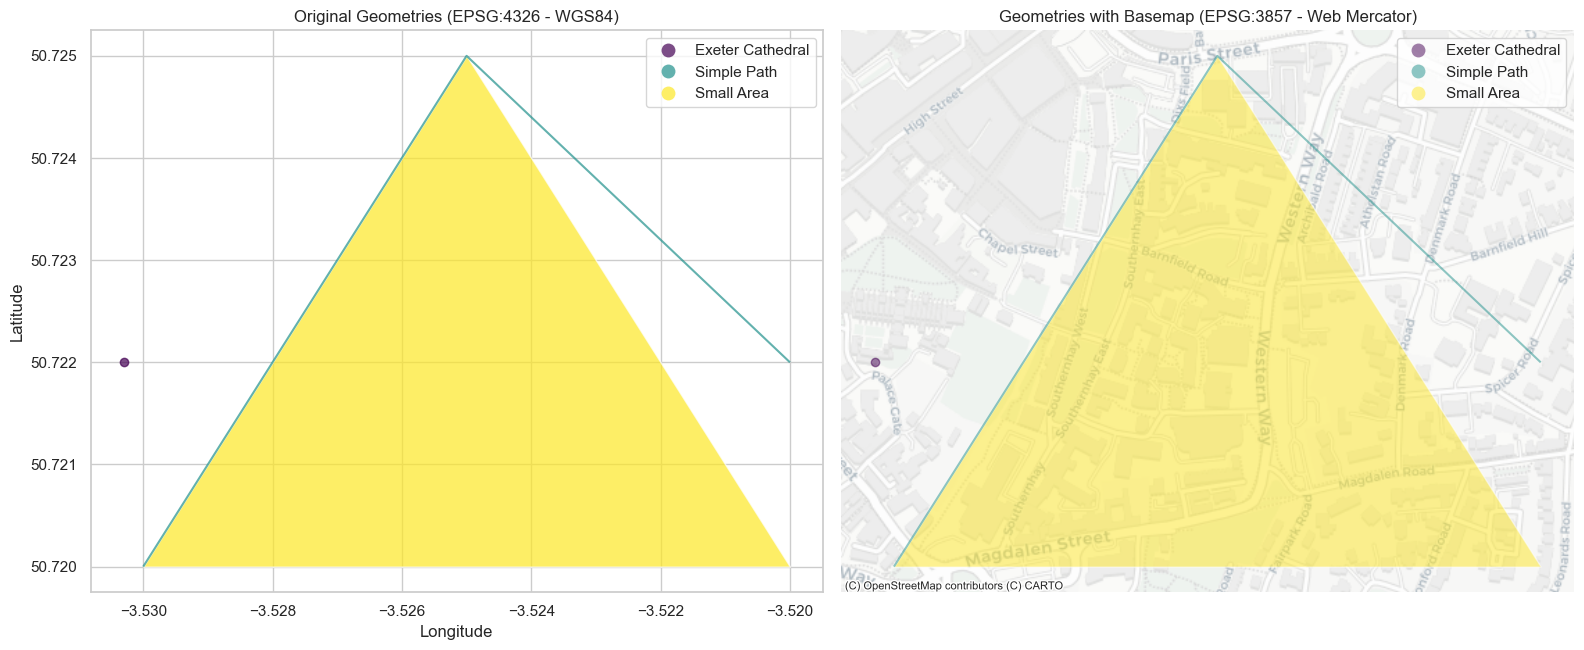

/var/folders/sy/gz5gl6d91cbfwd2z85r62rbc0000gn/T/ipykernel_22824/3114498251.py:41: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax_buffer.legend()


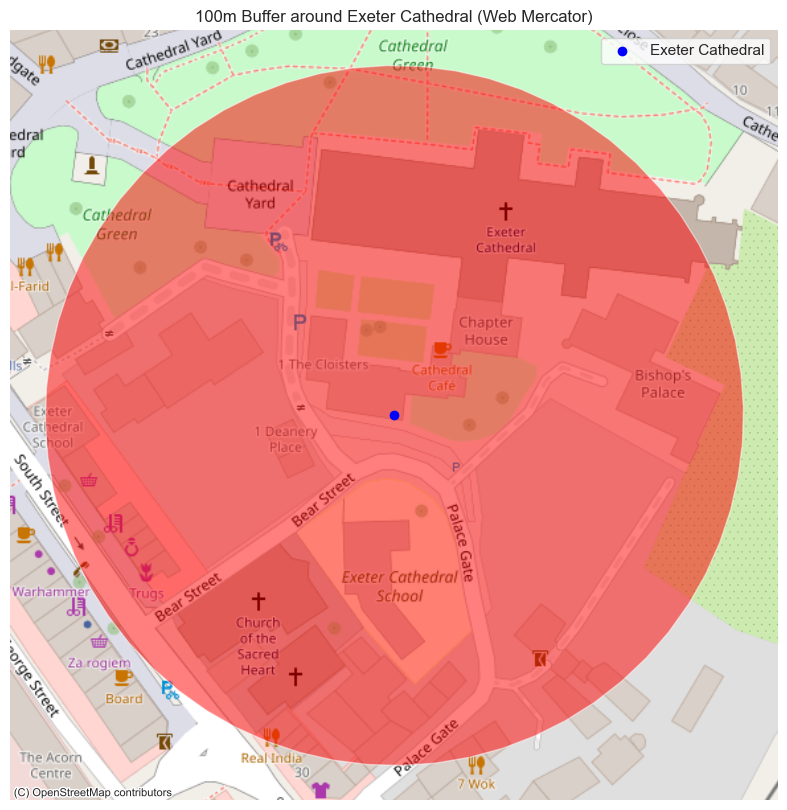

In [16]:
# Plotting the original GeoDataFrame (EPSG:4326 - WGS84)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

gdf.plot(ax=ax[0], legend=True, column='name', cmap='viridis', alpha=0.7)
ax[0].set_title("Original Geometries (EPSG:4326 - WGS84)")
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")


# For plotting with a basemap, reproject to Web Mercator (EPSG:3857)
gdf_web_mercator = gdf.to_crs(epsg=3857)
gdf_web_mercator.plot(ax=ax[1], legend=True, column='name', cmap='viridis', alpha=0.5) # Alpha for basemap visibility
try:
    ctx.add_basemap(ax[1], source=ctx.providers.CartoDB.Positron)
    ax[1].set_title("Geometries with Basemap (EPSG:3857 - Web Mercator)")
except Exception as e:
    ax[1].set_title("Geometries (EPSG:3857) - Basemap Failed to Load")
    print(f"Could not load basemap for Web Mercator plot: {e}")
    
ax[1].axis('off') # Often turn off axis for basemaps
plt.tight_layout()
plt.show()


# Plotting the 100m buffer created in British National Grid (EPSG:27700)
# We'll reproject the buffer to Web Mercator too for basemap consistency if desired,
# or plot it in its native CRS and add a BNG-compatible basemap if available and contextily is configured.
# For simplicity, let's reproject the buffer to Web Mercator for plotting with common basemaps.
point_buffer_web_mercator = point_buffer_bng_gdf.to_crs(epsg=3857)
exeter_cathedral_web_mercator = gdf_bng[gdf_bng['name'] == 'Exeter Cathedral'].to_crs(epsg=3857)

fig_buffer, ax_buffer = plt.subplots(figsize=(10, 10))
exeter_cathedral_web_mercator.plot(ax=ax_buffer, color='blue', label='Exeter Cathedral', zorder=2)
point_buffer_web_mercator.plot(ax=ax_buffer, color='red', alpha=0.5, label='100m Buffer', zorder=1)
try:
    ctx.add_basemap(ax_buffer, source=ctx.providers.OpenStreetMap.Mapnik) # Different basemap
except Exception as e:
    print(f"Could not load basemap for buffer plot: {e}")

ax_buffer.set_title("100m Buffer around Exeter Cathedral (Web Mercator)")
ax_buffer.legend()
ax_buffer.axis('off')
plt.show()

In [17]:
print(f"Original GDF CRS: {gdf.crs}")
print(f"Reprojected to BNG GDF CRS: {gdf_bng.crs}")
print(f"Reprojected to Web Mercator GDF CRS: {gdf_web_mercator.crs}")

# Example: Bounds of our data in different CRSs
print(f"\nBounds in WGS84 (EPSG:4326): {gdf.total_bounds}")
print(f"Bounds in BNG (EPSG:27700): {gdf_bng.total_bounds}") # x, y are in meters
print(f"Bounds in Web Mercator (EPSG:3857): {gdf_web_mercator.total_bounds}") # x, y are in meters

Original GDF CRS: EPSG:4326
Reprojected to BNG GDF CRS: EPSG:27700
Reprojected to Web Mercator GDF CRS: EPSG:3857

Bounds in WGS84 (EPSG:4326): [-3.5303 50.72   -3.52   50.725 ]
Bounds in BNG (EPSG:27700): [292075.82634403  92256.04729232 292802.84432669  92819.2656381 ]
Bounds in Web Mercator (EPSG:3857): [-392991.19834749 6571913.61961768 -391844.60759232 6572792.81363304]
